In [1]:
from models.kernels.group_kernel import GroupKernel
from groups.discrete_so2 import DiscreteSO2


In [2]:
kernel = GroupKernel(
    group=DiscreteSO2(order=4, device="cpu"),
    kernel_size=5,
    in_channels=2,
    out_channels=8
)
weights = kernel.sample_group_filter_bank()


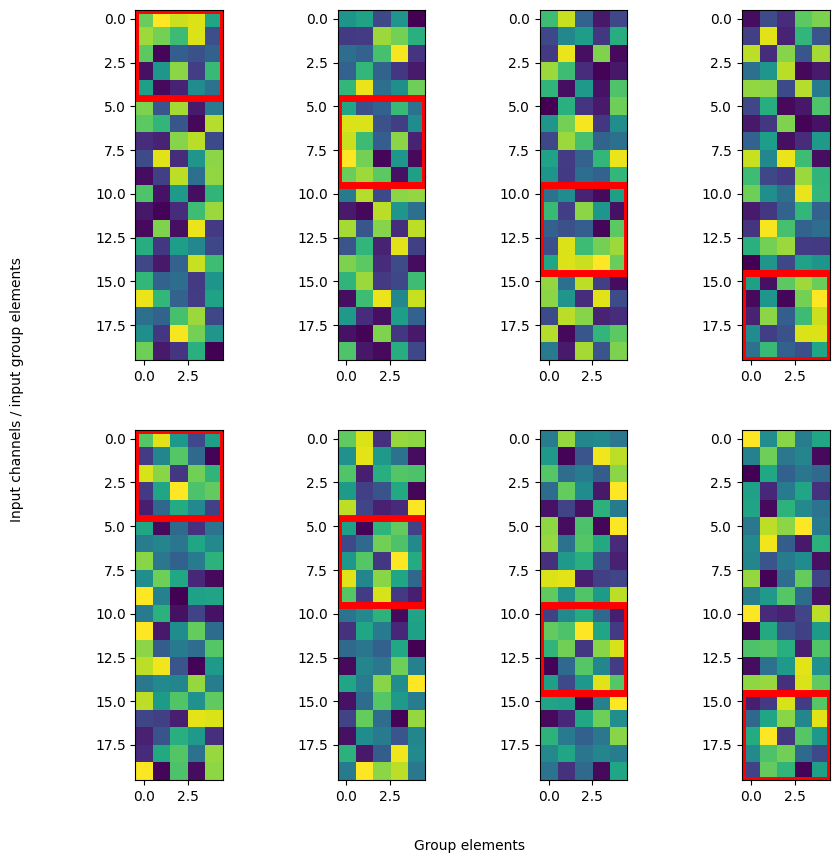

In [3]:
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

# For ease of viewing, we fold the input group dimension into the spatial x dimension
weights_t = weights.view(
    weights.shape[0],
    weights.shape[1],
    weights.shape[2],
    weights.shape[3] * weights.shape[4],
    weights.shape[5]
)

# pick an output channel to visualize
out_channel_idx = 0

# create [in_channels, group_elements] figures
fig, ax = plt.subplots(weights.shape[2], weights.shape[1])

for in_channel in range(weights.shape[2]):
  for group_elem in range(weights.shape[1]):
    ax[in_channel, group_elem].imshow(
        weights_t[out_channel_idx, group_elem, in_channel, :, :].detach()
    )

    # Outline the spatial kernel corresponding to the first group element under canonical transformation
    rect = matplotlib.patches.Rectangle(
        (-0.5, group_elem * weights_t.shape[-1] - 0.5), weights_t.shape[-1], weights_t.shape[-1], linewidth=5, edgecolor='r', facecolor='none')
    ax[in_channel, group_elem].add_patch(rect)

fig.text(0.5, 0.04, 'Group elements', ha='center')
fig.text(0.04, 0.5, 'Input channels / input group elements',
         va='center', rotation='vertical')

plt.show()
